In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
n_units=256
#n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_10degree = pd.read_csv('x_5degree_1rev.csv',header=None)

In [6]:
x_10degree = x_10degree.to_numpy(dtype='float32')

In [7]:
x = x_10degree[:, 0:15]

In [8]:
x = x.reshape(((72+1)*6, n_sensors, 1))

In [9]:
y_10degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_10degree = y_10degree.to_numpy(dtype='float32')

In [12]:
y = y_10degree.reshape((((72*1+1)*6, 100, 100)))

In [13]:
tsr = x_10degree[:, -2]

In [14]:
theta = x_10degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(394, 100, 100)


In [17]:
print(y_test.shape)

(44, 100, 100)


In [18]:
print(x_train.shape)

(394, 15, 1)


In [19]:
print(x_test.shape)

(44, 15, 1)


In [20]:
theta_train.shape

(394,)

In [21]:
tsr_train.shape

(394,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-08))(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-08))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-08))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-08))(x_)
#x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fifthHiddenLayerSensor')(x_)
'''x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='sixthHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='seventhHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='eighthHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='ninthHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='tenthHiddenLayerSensor')(x_)'''
output_data = tf.keras.layers.Dense(units=15, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((15, 1))(output_data)
# MLP
sensor_pred = tf.keras.Model(input_time, output_sensor)

In [24]:
sensor_pred.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 256)              768       
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 256)              65792     
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 256)              65792     
 se)                                                             
                                                             

In [25]:
sensor_pred.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((394, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((44, 2, 1))

In [28]:
tsr_theta_train.shape

(394, 2, 1)

In [29]:
start1 = datetime.datetime.now()
history1 = sensor_pred.fit(tsr_theta_train, x_train, epochs=10000, shuffle=True, batch_size=40)
end1 = datetime.datetime.now()

Epoch 1/10000
10/10 [==============================] - 1s 4ms/step - loss: 0.0266 - rmse: 0.1630
Epoch 2/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0212 - rmse: 0.1457
Epoch 3/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1399
Epoch 4/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1387
Epoch 5/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0192 - rmse: 0.1385
Epoch 6/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1383
Epoch 7/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1382
Epoch 8/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1381
Epoch 9/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0191 - rmse: 0.1380
Epoch 10/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1380
Epoch 11/10000
10/10 [=======

10/10 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1336
Epoch 85/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1339
Epoch 86/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1334
Epoch 87/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1333
Epoch 88/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1332
Epoch 89/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0177 - rmse: 0.1331
Epoch 90/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0177 - rmse: 0.1331
Epoch 91/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0177 - rmse: 0.1331
Epoch 92/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1328
Epoch 93/10000
10/10 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1328
Epoch 94/10000
10/10 [=============

10/10 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1289
Epoch 168/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1288
Epoch 169/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0167 - rmse: 0.1290
Epoch 170/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1290
Epoch 171/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1288
Epoch 172/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1287
Epoch 173/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1289
Epoch 174/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1289
Epoch 175/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1290
Epoch 176/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1288
Epoch 177/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1261
Epoch 250/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 251/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.1267
Epoch 252/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0159 - rmse: 0.1263
Epoch 253/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1262
Epoch 254/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1261
Epoch 255/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0160 - rmse: 0.1263
Epoch 256/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1259
Epoch 257/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0159 - rmse: 0.1261
Epoch 258/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0159 - rmse: 0.1259
Epoch 259/10000
10/10 [===

10/10 [==============================] - 0s 6ms/step - loss: 0.0154 - rmse: 0.1240
Epoch 332/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0152 - rmse: 0.1233
Epoch 333/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0152 - rmse: 0.1231
Epoch 334/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0152 - rmse: 0.1233
Epoch 335/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0151 - rmse: 0.1227
Epoch 336/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0151 - rmse: 0.1229
Epoch 337/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0150 - rmse: 0.1226
Epoch 338/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0150 - rmse: 0.1225
Epoch 339/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0150 - rmse: 0.1226
Epoch 340/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0150 - rmse: 0.1226
Epoch 341/10000
10/10 [===

10/10 [==============================] - 0s 6ms/step - loss: 0.0140 - rmse: 0.1181
Epoch 414/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0139 - rmse: 0.1179
Epoch 415/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0139 - rmse: 0.1178
Epoch 416/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0139 - rmse: 0.1180
Epoch 417/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0140 - rmse: 0.1181
Epoch 418/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0141 - rmse: 0.1186
Epoch 419/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0141 - rmse: 0.1188
Epoch 420/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0139 - rmse: 0.1178
Epoch 421/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0138 - rmse: 0.1176
Epoch 422/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0138 - rmse: 0.1175
Epoch 423/10000
10/10 [===

10/10 [==============================] - 0s 6ms/step - loss: 0.0126 - rmse: 0.1123
Epoch 496/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0126 - rmse: 0.1120
Epoch 497/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0125 - rmse: 0.1119
Epoch 498/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0125 - rmse: 0.1117
Epoch 499/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0125 - rmse: 0.1116
Epoch 500/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0125 - rmse: 0.1119
Epoch 501/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0125 - rmse: 0.1116
Epoch 502/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0123 - rmse: 0.1111
Epoch 503/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0124 - rmse: 0.1111
Epoch 504/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0125 - rmse: 0.1118
Epoch 505/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0107 - rmse: 0.1032
Epoch 578/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0107 - rmse: 0.1035
Epoch 579/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0108 - rmse: 0.1039
Epoch 580/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0106 - rmse: 0.1031
Epoch 581/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.1030
Epoch 582/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0107 - rmse: 0.1032
Epoch 583/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0105 - rmse: 0.1024
Epoch 584/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0105 - rmse: 0.1025
Epoch 585/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0106 - rmse: 0.1030
Epoch 586/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0104 - rmse: 0.1021
Epoch 587/10000
10/10 [===

10/10 [==============================] - 0s 6ms/step - loss: 0.0086 - rmse: 0.0928
Epoch 660/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0086 - rmse: 0.0925
Epoch 661/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0084 - rmse: 0.0918
Epoch 662/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0085 - rmse: 0.0920
Epoch 663/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0085 - rmse: 0.0919
Epoch 664/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0084 - rmse: 0.0918
Epoch 665/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0086 - rmse: 0.0924
Epoch 666/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0083 - rmse: 0.0913
Epoch 667/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0084 - rmse: 0.0917
Epoch 668/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0084 - rmse: 0.0914
Epoch 669/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0827
Epoch 742/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0828
Epoch 743/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0821
Epoch 744/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0818
Epoch 745/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0818
Epoch 746/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 747/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0815
Epoch 748/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0815
Epoch 749/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0811
Epoch 750/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0810
Epoch 751/10000
10/10 [===

10/10 [==============================] - 0s 6ms/step - loss: 0.0054 - rmse: 0.0738
Epoch 824/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0731
Epoch 825/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0726
Epoch 826/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0726
Epoch 827/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0734
Epoch 828/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0053 - rmse: 0.0729
Epoch 829/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0727
Epoch 830/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0723
Epoch 831/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0717
Epoch 832/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0720
Epoch 833/10000
10/10 [===

10/10 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0658
Epoch 906/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 907/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0650
Epoch 908/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 909/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 910/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 911/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 912/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0650
Epoch 913/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 914/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 915/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 988/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 989/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 990/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 991/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 992/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 993/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 994/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 995/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 996/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 997/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 1070/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 1071/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 1072/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 1073/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 1074/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 1075/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0552
Epoch 1076/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 1077/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 1078/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 1079/10000


10/10 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 1152/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 1153/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 1154/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 1155/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 1156/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 1157/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 1158/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 1159/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 1160/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0514
Epoch 1161/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 1234/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 1235/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 1236/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 1237/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 1238/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 1239/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 1240/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 1241/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 1242/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 1243/10000


10/10 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0436
Epoch 1316/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 1317/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0436
Epoch 1318/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0436
Epoch 1319/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0436
Epoch 1320/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 1321/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 1322/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 1323/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 1324/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 1325/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0404
Epoch 1398/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0404
Epoch 1399/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0408
Epoch 1400/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0404
Epoch 1401/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0406
Epoch 1402/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0406
Epoch 1403/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 1404/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0408
Epoch 1405/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0405
Epoch 1406/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0412
Epoch 1407/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 1480/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 1481/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 1482/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 1483/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 1484/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 1485/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 1486/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 1487/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 1488/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 1489/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 1562/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 1563/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 1564/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 1565/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 1566/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 1567/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 1568/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 1569/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 1570/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 1571/10000


10/10 [==============================] - 0s 5ms/step - loss: 9.9979e-04 - rmse: 0.0315
Epoch 1644/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 1645/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0320
Epoch 1646/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9723e-04 - rmse: 0.0314
Epoch 1647/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.9422e-04 - rmse: 0.0314
Epoch 1648/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0316
Epoch 1649/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.9299e-04 - rmse: 0.0314
Epoch 1650/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.8472e-04 - rmse: 0.0312
Epoch 1651/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 1652/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.03

10/10 [==============================] - 0s 5ms/step - loss: 8.9882e-04 - rmse: 0.0298
Epoch 1723/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.8986e-04 - rmse: 0.0297
Epoch 1724/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0576e-04 - rmse: 0.0300
Epoch 1725/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.8047e-04 - rmse: 0.0295
Epoch 1726/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6593e-04 - rmse: 0.0293
Epoch 1727/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0380e-04 - rmse: 0.0299
Epoch 1728/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.2347e-04 - rmse: 0.0302
Epoch 1729/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.9242e-04 - rmse: 0.0297
Epoch 1730/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7270e-04 - rmse: 0.0294
Epoch 1731/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.8

10/10 [==============================] - 0s 5ms/step - loss: 7.7597e-04 - rmse: 0.0277
Epoch 1801/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6233e-04 - rmse: 0.0275
Epoch 1802/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5100e-04 - rmse: 0.0272
Epoch 1803/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5726e-04 - rmse: 0.0274
Epoch 1804/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6412e-04 - rmse: 0.0275
Epoch 1805/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6333e-04 - rmse: 0.0275
Epoch 1806/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8324e-04 - rmse: 0.0278
Epoch 1807/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8132e-04 - rmse: 0.0278
Epoch 1808/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7306e-04 - rmse: 0.0276
Epoch 1809/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0

10/10 [==============================] - 0s 6ms/step - loss: 6.6887e-04 - rmse: 0.0257
Epoch 1879/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5975e-04 - rmse: 0.0255
Epoch 1880/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1061e-04 - rmse: 0.0265
Epoch 1881/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0757e-04 - rmse: 0.0264
Epoch 1882/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1809e-04 - rmse: 0.0266
Epoch 1883/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2171e-04 - rmse: 0.0267
Epoch 1884/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8410e-04 - rmse: 0.0260
Epoch 1885/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6029e-04 - rmse: 0.0255
Epoch 1886/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6560e-04 - rmse: 0.0256
Epoch 1887/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7

10/10 [==============================] - 0s 5ms/step - loss: 6.2316e-04 - rmse: 0.0248
Epoch 1957/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9620e-04 - rmse: 0.0242
Epoch 1958/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1222e-04 - rmse: 0.0246
Epoch 1959/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3286e-04 - rmse: 0.0250
Epoch 1960/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0962e-04 - rmse: 0.0245
Epoch 1961/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9506e-04 - rmse: 0.0242
Epoch 1962/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8922e-04 - rmse: 0.0241
Epoch 1963/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9395e-04 - rmse: 0.0242
Epoch 1964/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7955e-04 - rmse: 0.0239
Epoch 1965/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7

10/10 [==============================] - 0s 6ms/step - loss: 5.8110e-04 - rmse: 0.0239
Epoch 2035/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5011e-04 - rmse: 0.0233
Epoch 2036/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2254e-04 - rmse: 0.0227
Epoch 2037/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2113e-04 - rmse: 0.0226
Epoch 2038/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4048e-04 - rmse: 0.0231
Epoch 2039/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4326e-04 - rmse: 0.0231
Epoch 2040/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3167e-04 - rmse: 0.0229
Epoch 2041/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1487e-04 - rmse: 0.0225
Epoch 2042/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2803e-04 - rmse: 0.0228
Epoch 2043/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3

10/10 [==============================] - 0s 6ms/step - loss: 5.1753e-04 - rmse: 0.0226
Epoch 2113/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7478e-04 - rmse: 0.0216
Epoch 2114/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8616e-04 - rmse: 0.0219
Epoch 2115/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8614e-04 - rmse: 0.0219
Epoch 2116/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8597e-04 - rmse: 0.0218
Epoch 2117/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6907e-04 - rmse: 0.0215
Epoch 2118/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7054e-04 - rmse: 0.0215
Epoch 2119/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7530e-04 - rmse: 0.0216
Epoch 2120/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5857e-04 - rmse: 0.0212
Epoch 2121/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5

10/10 [==============================] - 0s 5ms/step - loss: 4.6788e-04 - rmse: 0.0214
Epoch 2191/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7620e-04 - rmse: 0.0216
Epoch 2192/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9557e-04 - rmse: 0.0221
Epoch 2193/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8253e-04 - rmse: 0.0218
Epoch 2194/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8450e-04 - rmse: 0.0218
Epoch 2195/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6744e-04 - rmse: 0.0214
Epoch 2196/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3905e-04 - rmse: 0.0207
Epoch 2197/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8478e-04 - rmse: 0.0218
Epoch 2198/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.3779e-04 - rmse: 0.0207
Epoch 2199/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3

10/10 [==============================] - 0s 6ms/step - loss: 3.9652e-04 - rmse: 0.0197
Epoch 2269/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9081e-04 - rmse: 0.0195
Epoch 2270/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1935e-04 - rmse: 0.0203
Epoch 2271/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0533e-04 - rmse: 0.0199
Epoch 2272/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0574e-04 - rmse: 0.0199
Epoch 2273/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0689e-04 - rmse: 0.0200
Epoch 2274/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0968e-04 - rmse: 0.0200
Epoch 2275/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3342e-04 - rmse: 0.0206
Epoch 2276/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0455e-04 - rmse: 0.0199
Epoch 2277/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.9

10/10 [==============================] - 0s 6ms/step - loss: 3.4622e-04 - rmse: 0.0184
Epoch 2347/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6268e-04 - rmse: 0.0188
Epoch 2348/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5279e-04 - rmse: 0.0186
Epoch 2349/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5754e-04 - rmse: 0.0187
Epoch 2350/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6784e-04 - rmse: 0.0190
Epoch 2351/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7382e-04 - rmse: 0.0191
Epoch 2352/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6958e-04 - rmse: 0.0190
Epoch 2353/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6257e-04 - rmse: 0.0188
Epoch 2354/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7786e-04 - rmse: 0.0192
Epoch 2355/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0

10/10 [==============================] - 0s 6ms/step - loss: 3.5096e-04 - rmse: 0.0185
Epoch 2425/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4328e-04 - rmse: 0.0183
Epoch 2426/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3275e-04 - rmse: 0.0180
Epoch 2427/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3272e-04 - rmse: 0.0180
Epoch 2428/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3983e-04 - rmse: 0.0182
Epoch 2429/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5414e-04 - rmse: 0.0186
Epoch 2430/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4586e-04 - rmse: 0.0184
Epoch 2431/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5899e-04 - rmse: 0.0187
Epoch 2432/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5769e-04 - rmse: 0.0187
Epoch 2433/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4

10/10 [==============================] - 0s 5ms/step - loss: 3.4051e-04 - rmse: 0.0182
Epoch 2503/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4458e-04 - rmse: 0.0183
Epoch 2504/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6297e-04 - rmse: 0.0188
Epoch 2505/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5583e-04 - rmse: 0.0186
Epoch 2506/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4192e-04 - rmse: 0.0183
Epoch 2507/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2951e-04 - rmse: 0.0179
Epoch 2508/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2544e-04 - rmse: 0.0178
Epoch 2509/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2124e-04 - rmse: 0.0177
Epoch 2510/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1289e-04 - rmse: 0.0174
Epoch 2511/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 2.9160e-04 - rmse: 0.0168
Epoch 2581/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9450e-04 - rmse: 0.0169
Epoch 2582/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8428e-04 - rmse: 0.0166
Epoch 2583/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8633e-04 - rmse: 0.0167
Epoch 2584/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9328e-04 - rmse: 0.0169
Epoch 2585/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9689e-04 - rmse: 0.0170
Epoch 2586/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9099e-04 - rmse: 0.0168
Epoch 2587/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9343e-04 - rmse: 0.0169
Epoch 2588/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0349e-04 - rmse: 0.0172
Epoch 2589/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1

10/10 [==============================] - 0s 5ms/step - loss: 3.1166e-04 - rmse: 0.0174
Epoch 2659/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0179e-04 - rmse: 0.0171
Epoch 2660/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7262e-04 - rmse: 0.0163
Epoch 2661/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7099e-04 - rmse: 0.0162
Epoch 2662/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6916e-04 - rmse: 0.0161
Epoch 2663/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6445e-04 - rmse: 0.0160
Epoch 2664/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7455e-04 - rmse: 0.0163
Epoch 2665/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8080e-04 - rmse: 0.0165
Epoch 2666/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8333e-04 - rmse: 0.0166
Epoch 2667/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8

10/10 [==============================] - 0s 5ms/step - loss: 2.5962e-04 - rmse: 0.0158
Epoch 2737/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6768e-04 - rmse: 0.0161
Epoch 2738/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7080e-04 - rmse: 0.0162
Epoch 2739/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5745e-04 - rmse: 0.0158
Epoch 2740/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6147e-04 - rmse: 0.0159
Epoch 2741/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6050e-04 - rmse: 0.0159
Epoch 2742/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6948e-04 - rmse: 0.0162
Epoch 2743/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5944e-04 - rmse: 0.0158
Epoch 2744/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6957e-04 - rmse: 0.0162
Epoch 2745/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.5140e-04 - rmse: 0.0156
Epoch 2815/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5583e-04 - rmse: 0.0157
Epoch 2816/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5108e-04 - rmse: 0.0156
Epoch 2817/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4684e-04 - rmse: 0.0154
Epoch 2818/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4144e-04 - rmse: 0.0153
Epoch 2819/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3408e-04 - rmse: 0.0150
Epoch 2820/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3554e-04 - rmse: 0.0151
Epoch 2821/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3764e-04 - rmse: 0.0151
Epoch 2822/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3631e-04 - rmse: 0.0151
Epoch 2823/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.3755e-04 - rmse: 0.0151
Epoch 2893/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2647e-04 - rmse: 0.0148
Epoch 2894/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3354e-04 - rmse: 0.0150
Epoch 2895/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6220e-04 - rmse: 0.0159
Epoch 2896/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5968e-04 - rmse: 0.0158
Epoch 2897/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3776e-04 - rmse: 0.0151
Epoch 2898/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4445e-04 - rmse: 0.0154
Epoch 2899/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4175e-04 - rmse: 0.0153
Epoch 2900/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4531e-04 - rmse: 0.0154
Epoch 2901/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.3045e-04 - rmse: 0.0149
Epoch 2971/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.2444e-04 - rmse: 0.0147
Epoch 2972/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2638e-04 - rmse: 0.0148
Epoch 2973/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3392e-04 - rmse: 0.0150
Epoch 2974/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3801e-04 - rmse: 0.0152
Epoch 2975/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.2112e-04 - rmse: 0.0146
Epoch 2976/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1947e-04 - rmse: 0.0145
Epoch 2977/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1385e-04 - rmse: 0.0143
Epoch 2978/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2119e-04 - rmse: 0.0146
Epoch 2979/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 2.1635e-04 - rmse: 0.0144
Epoch 3049/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0556e-04 - rmse: 0.0140
Epoch 3050/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9970e-04 - rmse: 0.0138
Epoch 3051/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1070e-04 - rmse: 0.0142
Epoch 3052/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.2439e-04 - rmse: 0.0147
Epoch 3053/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0353e-04 - rmse: 0.0140
Epoch 3054/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0700e-04 - rmse: 0.0141
Epoch 3055/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1220e-04 - rmse: 0.0143
Epoch 3056/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.9560e-04 - rmse: 0.0137
Epoch 3057/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1

10/10 [==============================] - 0s 5ms/step - loss: 1.9016e-04 - rmse: 0.0135
Epoch 3127/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9710e-04 - rmse: 0.0137
Epoch 3128/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0683e-04 - rmse: 0.0141
Epoch 3129/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0053e-04 - rmse: 0.0139
Epoch 3130/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8838e-04 - rmse: 0.0134
Epoch 3131/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9484e-04 - rmse: 0.0137
Epoch 3132/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0092e-04 - rmse: 0.0139
Epoch 3133/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.9674e-04 - rmse: 0.0137
Epoch 3134/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0799e-04 - rmse: 0.0141
Epoch 3135/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 1.9091e-04 - rmse: 0.0135
Epoch 3205/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9587e-04 - rmse: 0.0137
Epoch 3206/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8081e-04 - rmse: 0.0131
Epoch 3207/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7795e-04 - rmse: 0.0130
Epoch 3208/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8625e-04 - rmse: 0.0133
Epoch 3209/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9402e-04 - rmse: 0.0136
Epoch 3210/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8548e-04 - rmse: 0.0133
Epoch 3211/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9058e-04 - rmse: 0.0135
Epoch 3212/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9098e-04 - rmse: 0.0135
Epoch 3213/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.9

10/10 [==============================] - 0s 7ms/step - loss: 1.7755e-04 - rmse: 0.0130
Epoch 3283/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.6992e-04 - rmse: 0.0127
Epoch 3284/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.7534e-04 - rmse: 0.0129
Epoch 3285/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7856e-04 - rmse: 0.0130
Epoch 3286/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7007e-04 - rmse: 0.0127
Epoch 3287/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6515e-04 - rmse: 0.0125
Epoch 3288/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7718e-04 - rmse: 0.0130
Epoch 3289/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7928e-04 - rmse: 0.0131
Epoch 3290/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.9440e-04 - rmse: 0.0136
Epoch 3291/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9

10/10 [==============================] - 0s 6ms/step - loss: 1.7870e-04 - rmse: 0.0131
Epoch 3361/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6635e-04 - rmse: 0.0126
Epoch 3362/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6930e-04 - rmse: 0.0127
Epoch 3363/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7008e-04 - rmse: 0.0127
Epoch 3364/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6266e-04 - rmse: 0.0124
Epoch 3365/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6606e-04 - rmse: 0.0126
Epoch 3366/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6914e-04 - rmse: 0.0127
Epoch 3367/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8060e-04 - rmse: 0.0131
Epoch 3368/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8794e-04 - rmse: 0.0134
Epoch 3369/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.1

10/10 [==============================] - 0s 5ms/step - loss: 1.6922e-04 - rmse: 0.0127
Epoch 3439/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7209e-04 - rmse: 0.0128
Epoch 3440/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6637e-04 - rmse: 0.0126
Epoch 3441/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8983e-04 - rmse: 0.0135
Epoch 3442/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8580e-04 - rmse: 0.0133
Epoch 3443/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7074e-04 - rmse: 0.0127
Epoch 3444/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6182e-04 - rmse: 0.0124
Epoch 3445/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6310e-04 - rmse: 0.0124
Epoch 3446/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6300e-04 - rmse: 0.0124
Epoch 3447/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5

10/10 [==============================] - 0s 6ms/step - loss: 1.5094e-04 - rmse: 0.0119
Epoch 3517/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5242e-04 - rmse: 0.0120
Epoch 3518/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6267e-04 - rmse: 0.0124
Epoch 3519/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6506e-04 - rmse: 0.0125
Epoch 3520/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4964e-04 - rmse: 0.0119
Epoch 3521/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5702e-04 - rmse: 0.0122
Epoch 3522/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9291e-04 - rmse: 0.0136
Epoch 3523/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8573e-04 - rmse: 0.0133
Epoch 3524/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8789e-04 - rmse: 0.0134
Epoch 3525/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7

10/10 [==============================] - 0s 5ms/step - loss: 1.4927e-04 - rmse: 0.0119
Epoch 3595/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5124e-04 - rmse: 0.0120
Epoch 3596/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4467e-04 - rmse: 0.0117
Epoch 3597/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4543e-04 - rmse: 0.0117
Epoch 3598/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5240e-04 - rmse: 0.0120
Epoch 3599/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6850e-04 - rmse: 0.0127
Epoch 3600/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5668e-04 - rmse: 0.0122
Epoch 3601/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5230e-04 - rmse: 0.0120
Epoch 3602/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5208e-04 - rmse: 0.0120
Epoch 3603/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5

10/10 [==============================] - 0s 5ms/step - loss: 1.3977e-04 - rmse: 0.0115
Epoch 3673/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2738e-04 - rmse: 0.0109
Epoch 3674/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2765e-04 - rmse: 0.0109
Epoch 3675/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2693e-04 - rmse: 0.0109
Epoch 3676/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2812e-04 - rmse: 0.0109
Epoch 3677/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3577e-04 - rmse: 0.0113
Epoch 3678/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3975e-04 - rmse: 0.0115
Epoch 3679/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3810e-04 - rmse: 0.0114
Epoch 3680/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4033e-04 - rmse: 0.0115
Epoch 3681/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3

10/10 [==============================] - 0s 5ms/step - loss: 1.3260e-04 - rmse: 0.0111
Epoch 3751/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4062e-04 - rmse: 0.0115
Epoch 3752/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4703e-04 - rmse: 0.0118
Epoch 3753/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3886e-04 - rmse: 0.0114
Epoch 3754/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3685e-04 - rmse: 0.0113
Epoch 3755/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3542e-04 - rmse: 0.0113
Epoch 3756/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4202e-04 - rmse: 0.0116
Epoch 3757/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5619e-04 - rmse: 0.0122
Epoch 3758/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5277e-04 - rmse: 0.0120
Epoch 3759/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 1.2625e-04 - rmse: 0.0109
Epoch 3829/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2531e-04 - rmse: 0.0108
Epoch 3830/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1749e-04 - rmse: 0.0105
Epoch 3831/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3715e-04 - rmse: 0.0114
Epoch 3832/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5753e-04 - rmse: 0.0122
Epoch 3833/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6514e-04 - rmse: 0.0125
Epoch 3834/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6253e-04 - rmse: 0.0124
Epoch 3835/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5410e-04 - rmse: 0.0121
Epoch 3836/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3525e-04 - rmse: 0.0113
Epoch 3837/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3

10/10 [==============================] - 0s 6ms/step - loss: 1.4353e-04 - rmse: 0.0116
Epoch 3907/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2425e-04 - rmse: 0.0108
Epoch 3908/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2849e-04 - rmse: 0.0110
Epoch 3909/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2635e-04 - rmse: 0.0109
Epoch 3910/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2361e-04 - rmse: 0.0107
Epoch 3911/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3395e-04 - rmse: 0.0112
Epoch 3912/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3159e-04 - rmse: 0.0111
Epoch 3913/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2353e-04 - rmse: 0.0107
Epoch 3914/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3425e-04 - rmse: 0.0112
Epoch 3915/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2

10/10 [==============================] - 0s 4ms/step - loss: 1.1341e-04 - rmse: 0.0103
Epoch 3985/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1151e-04 - rmse: 0.0102
Epoch 3986/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1192e-04 - rmse: 0.0102
Epoch 3987/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1747e-04 - rmse: 0.0105
Epoch 3988/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1181e-04 - rmse: 0.0102
Epoch 3989/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.3587e-04 - rmse: 0.0113
Epoch 3990/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2575e-04 - rmse: 0.0108
Epoch 3991/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1860e-04 - rmse: 0.0105
Epoch 3992/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1465e-04 - rmse: 0.0103
Epoch 3993/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.3953e-04 - rmse: 0.0115
Epoch 4063/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1681e-04 - rmse: 0.0104
Epoch 4064/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1560e-04 - rmse: 0.0104
Epoch 4065/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1819e-04 - rmse: 0.0105
Epoch 4066/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1610e-04 - rmse: 0.0104
Epoch 4067/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0973e-04 - rmse: 0.0101
Epoch 4068/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0735e-04 - rmse: 0.0100
Epoch 4069/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1302e-04 - rmse: 0.0102
Epoch 4070/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2051e-04 - rmse: 0.0106
Epoch 4071/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 4ms/step - loss: 1.1483e-04 - rmse: 0.0103
Epoch 4141/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0399e-04 - rmse: 0.0098
Epoch 4142/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1013e-04 - rmse: 0.0101
Epoch 4143/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0794e-04 - rmse: 0.0100
Epoch 4144/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0350e-04 - rmse: 0.0098
Epoch 4145/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1565e-04 - rmse: 0.0104
Epoch 4146/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.2938e-04 - rmse: 0.0110
Epoch 4147/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1927e-04 - rmse: 0.0105
Epoch 4148/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.1805e-04 - rmse: 0.0105
Epoch 4149/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0

10/10 [==============================] - 0s 4ms/step - loss: 1.0017e-04 - rmse: 0.0096
Epoch 4219/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0063e-04 - rmse: 0.0096
Epoch 4220/10000
10/10 [==============================] - 0s 4ms/step - loss: 1.0142e-04 - rmse: 0.0097
Epoch 4221/10000
10/10 [==============================] - 0s 4ms/step - loss: 9.5451e-05 - rmse: 0.0093
Epoch 4222/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8683e-05 - rmse: 0.0095
Epoch 4223/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0401e-04 - rmse: 0.0098
Epoch 4224/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1436e-04 - rmse: 0.0103
Epoch 4225/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0698e-04 - rmse: 0.0099
Epoch 4226/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9828e-05 - rmse: 0.0096
Epoch 4227/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 9.6020e-05 - rmse: 0.0094
Epoch 4297/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6044e-05 - rmse: 0.0094
Epoch 4298/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9370e-05 - rmse: 0.0090
Epoch 4299/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3945e-05 - rmse: 0.0093
Epoch 4300/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5972e-05 - rmse: 0.0094
Epoch 4301/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8587e-05 - rmse: 0.0095
Epoch 4302/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5637e-05 - rmse: 0.0093
Epoch 4303/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2737e-05 - rmse: 0.0092
Epoch 4304/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2949e-05 - rmse: 0.0092
Epoch 4305/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2

10/10 [==============================] - 0s 5ms/step - loss: 1.0222e-04 - rmse: 0.0097
Epoch 4375/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7719e-05 - rmse: 0.0095
Epoch 4376/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9222e-05 - rmse: 0.0095
Epoch 4377/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.2333e-05 - rmse: 0.0092
Epoch 4378/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3895e-05 - rmse: 0.0093
Epoch 4379/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5642e-05 - rmse: 0.0094
Epoch 4380/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9747e-05 - rmse: 0.0096
Epoch 4381/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6581e-05 - rmse: 0.0089
Epoch 4382/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4842e-05 - rmse: 0.0088
Epoch 4383/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1

10/10 [==============================] - 0s 6ms/step - loss: 9.7894e-05 - rmse: 0.0095
Epoch 4453/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4572e-05 - rmse: 0.0093
Epoch 4454/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.9419e-05 - rmse: 0.0090
Epoch 4455/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4854e-05 - rmse: 0.0088
Epoch 4456/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7793e-05 - rmse: 0.0089
Epoch 4457/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0355e-04 - rmse: 0.0098
Epoch 4458/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0554e-04 - rmse: 0.0099
Epoch 4459/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0708e-04 - rmse: 0.0099
Epoch 4460/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0248e-04 - rmse: 0.0097
Epoch 4461/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1

10/10 [==============================] - 0s 5ms/step - loss: 9.6670e-05 - rmse: 0.0094
Epoch 4531/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0284e-04 - rmse: 0.0097
Epoch 4532/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0029e-04 - rmse: 0.0096
Epoch 4533/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0574e-04 - rmse: 0.0099
Epoch 4534/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.5907e-05 - rmse: 0.0094
Epoch 4535/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5247e-05 - rmse: 0.0088
Epoch 4536/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9843e-05 - rmse: 0.0085
Epoch 4537/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0646e-05 - rmse: 0.0085
Epoch 4538/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1224e-05 - rmse: 0.0091
Epoch 4539/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.4

10/10 [==============================] - 0s 5ms/step - loss: 9.9912e-05 - rmse: 0.0096
Epoch 4609/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0412e-04 - rmse: 0.0098
Epoch 4610/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1204e-04 - rmse: 0.0102
Epoch 4611/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.9994e-05 - rmse: 0.0096
Epoch 4612/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2218e-05 - rmse: 0.0092
Epoch 4613/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.6135e-05 - rmse: 0.0094
Epoch 4614/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6911e-05 - rmse: 0.0089
Epoch 4615/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9214e-05 - rmse: 0.0084
Epoch 4616/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6037e-05 - rmse: 0.0088
Epoch 4617/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.8

10/10 [==============================] - 0s 6ms/step - loss: 9.2346e-05 - rmse: 0.0092
Epoch 4687/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1117e-04 - rmse: 0.0101
Epoch 4688/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0365e-04 - rmse: 0.0098
Epoch 4689/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1615e-05 - rmse: 0.0091
Epoch 4690/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.7256e-05 - rmse: 0.0094
Epoch 4691/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1737e-05 - rmse: 0.0091
Epoch 4692/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.7160e-05 - rmse: 0.0094
Epoch 4693/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0667e-04 - rmse: 0.0099
Epoch 4694/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0280e-04 - rmse: 0.0097
Epoch 4695/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8

10/10 [==============================] - 0s 5ms/step - loss: 8.3070e-05 - rmse: 0.0087
Epoch 4765/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8279e-05 - rmse: 0.0084
Epoch 4766/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1676e-05 - rmse: 0.0080
Epoch 4767/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8165e-05 - rmse: 0.0084
Epoch 4768/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1553e-05 - rmse: 0.0080
Epoch 4769/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2758e-05 - rmse: 0.0080
Epoch 4770/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5238e-05 - rmse: 0.0082
Epoch 4771/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9954e-05 - rmse: 0.0079
Epoch 4772/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4586e-05 - rmse: 0.0081
Epoch 4773/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5

10/10 [==============================] - 0s 5ms/step - loss: 7.4292e-05 - rmse: 0.0081
Epoch 4843/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0175e-05 - rmse: 0.0079
Epoch 4844/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7121e-05 - rmse: 0.0077
Epoch 4845/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4366e-05 - rmse: 0.0081
Epoch 4846/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3457e-05 - rmse: 0.0081
Epoch 4847/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3312e-05 - rmse: 0.0081
Epoch 4848/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1271e-05 - rmse: 0.0079
Epoch 4849/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9913e-05 - rmse: 0.0079
Epoch 4850/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1362e-05 - rmse: 0.0079
Epoch 4851/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2

10/10 [==============================] - 0s 5ms/step - loss: 6.9413e-05 - rmse: 0.0078
Epoch 4921/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9710e-05 - rmse: 0.0078
Epoch 4922/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4111e-05 - rmse: 0.0081
Epoch 4923/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2455e-05 - rmse: 0.0080
Epoch 4924/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0823e-05 - rmse: 0.0079
Epoch 4925/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2461e-05 - rmse: 0.0080
Epoch 4926/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0696e-05 - rmse: 0.0079
Epoch 4927/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6060e-05 - rmse: 0.0082
Epoch 4928/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3584e-05 - rmse: 0.0081
Epoch 4929/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1

10/10 [==============================] - 0s 6ms/step - loss: 7.8700e-05 - rmse: 0.0084
Epoch 4999/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6893e-05 - rmse: 0.0077
Epoch 5000/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9942e-05 - rmse: 0.0079
Epoch 5001/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7943e-05 - rmse: 0.0077
Epoch 5002/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4421e-05 - rmse: 0.0075
Epoch 5003/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6142e-05 - rmse: 0.0076
Epoch 5004/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7351e-05 - rmse: 0.0083
Epoch 5005/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.3161e-05 - rmse: 0.0087
Epoch 5006/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3510e-05 - rmse: 0.0081
Epoch 5007/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7

10/10 [==============================] - 0s 5ms/step - loss: 6.8235e-05 - rmse: 0.0078
Epoch 5077/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7357e-05 - rmse: 0.0077
Epoch 5078/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2176e-05 - rmse: 0.0080
Epoch 5079/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6711e-05 - rmse: 0.0089
Epoch 5080/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9197e-05 - rmse: 0.0084
Epoch 5081/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4599e-05 - rmse: 0.0093
Epoch 5082/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0057e-05 - rmse: 0.0085
Epoch 5083/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5751e-05 - rmse: 0.0088
Epoch 5084/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0250e-04 - rmse: 0.0097
Epoch 5085/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6

10/10 [==============================] - 0s 6ms/step - loss: 6.5796e-05 - rmse: 0.0076
Epoch 5155/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0257e-05 - rmse: 0.0079
Epoch 5156/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9641e-05 - rmse: 0.0078
Epoch 5157/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0446e-05 - rmse: 0.0085
Epoch 5158/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4581e-05 - rmse: 0.0075
Epoch 5159/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1447e-05 - rmse: 0.0080
Epoch 5160/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7679e-05 - rmse: 0.0077
Epoch 5161/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7853e-05 - rmse: 0.0077
Epoch 5162/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4952e-05 - rmse: 0.0075
Epoch 5163/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1

10/10 [==============================] - 0s 6ms/step - loss: 5.9713e-05 - rmse: 0.0072
Epoch 5233/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7856e-05 - rmse: 0.0071
Epoch 5234/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0504e-05 - rmse: 0.0072
Epoch 5235/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0218e-05 - rmse: 0.0072
Epoch 5236/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9593e-05 - rmse: 0.0072
Epoch 5237/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3463e-05 - rmse: 0.0074
Epoch 5238/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9729e-05 - rmse: 0.0072
Epoch 5239/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0664e-05 - rmse: 0.0072
Epoch 5240/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9471e-05 - rmse: 0.0072
Epoch 5241/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5

10/10 [==============================] - 0s 5ms/step - loss: 5.8807e-05 - rmse: 0.0071
Epoch 5311/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2882e-05 - rmse: 0.0074
Epoch 5312/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6686e-05 - rmse: 0.0070
Epoch 5313/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7073e-05 - rmse: 0.0070
Epoch 5314/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8756e-05 - rmse: 0.0071
Epoch 5315/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6748e-05 - rmse: 0.0070
Epoch 5316/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7923e-05 - rmse: 0.0071
Epoch 5317/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8149e-05 - rmse: 0.0077
Epoch 5318/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3510e-05 - rmse: 0.0074
Epoch 5319/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8

10/10 [==============================] - 0s 6ms/step - loss: 5.8439e-05 - rmse: 0.0071
Epoch 5389/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7556e-05 - rmse: 0.0070
Epoch 5390/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7708e-05 - rmse: 0.0077
Epoch 5391/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.6985e-05 - rmse: 0.0089
Epoch 5392/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9734e-05 - rmse: 0.0078
Epoch 5393/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5763e-05 - rmse: 0.0076
Epoch 5394/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4494e-05 - rmse: 0.0075
Epoch 5395/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2895e-05 - rmse: 0.0074
Epoch 5396/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8313e-05 - rmse: 0.0071
Epoch 5397/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8

10/10 [==============================] - 0s 6ms/step - loss: 6.1428e-05 - rmse: 0.0073
Epoch 5467/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2521e-05 - rmse: 0.0074
Epoch 5468/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7472e-05 - rmse: 0.0077
Epoch 5469/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4232e-05 - rmse: 0.0075
Epoch 5470/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6648e-05 - rmse: 0.0077
Epoch 5471/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2414e-04 - rmse: 0.0108
Epoch 5472/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1448e-04 - rmse: 0.0103
Epoch 5473/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.1065e-05 - rmse: 0.0091
Epoch 5474/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1118e-05 - rmse: 0.0079
Epoch 5475/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2

10/10 [==============================] - 0s 5ms/step - loss: 5.2489e-05 - rmse: 0.0067
Epoch 5545/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5567e-05 - rmse: 0.0069
Epoch 5546/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8953e-05 - rmse: 0.0064
Epoch 5547/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9146e-05 - rmse: 0.0064
Epoch 5548/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2256e-05 - rmse: 0.0066
Epoch 5549/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0421e-05 - rmse: 0.0065
Epoch 5550/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7361e-05 - rmse: 0.0070
Epoch 5551/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3600e-05 - rmse: 0.0074
Epoch 5552/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8699e-05 - rmse: 0.0071
Epoch 5553/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7

10/10 [==============================] - 0s 6ms/step - loss: 6.6282e-05 - rmse: 0.0076
Epoch 5623/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5800e-05 - rmse: 0.0076
Epoch 5624/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3180e-05 - rmse: 0.0067
Epoch 5625/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2490e-05 - rmse: 0.0067
Epoch 5626/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5835e-05 - rmse: 0.0069
Epoch 5627/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6543e-05 - rmse: 0.0070
Epoch 5628/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1752e-05 - rmse: 0.0066
Epoch 5629/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7630e-05 - rmse: 0.0070
Epoch 5630/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5306e-05 - rmse: 0.0076
Epoch 5631/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3

10/10 [==============================] - 0s 6ms/step - loss: 5.4138e-05 - rmse: 0.0068
Epoch 5701/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2258e-05 - rmse: 0.0066
Epoch 5702/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9878e-05 - rmse: 0.0065
Epoch 5703/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4605e-05 - rmse: 0.0068
Epoch 5704/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2626e-05 - rmse: 0.0074
Epoch 5705/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3853e-05 - rmse: 0.0068
Epoch 5706/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3133e-05 - rmse: 0.0067
Epoch 5707/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9689e-05 - rmse: 0.0072
Epoch 5708/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1244e-05 - rmse: 0.0073
Epoch 5709/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8

10/10 [==============================] - 0s 6ms/step - loss: 6.2150e-05 - rmse: 0.0074
Epoch 5779/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6925e-05 - rmse: 0.0070
Epoch 5780/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4481e-05 - rmse: 0.0068
Epoch 5781/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5039e-05 - rmse: 0.0069
Epoch 5782/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7972e-05 - rmse: 0.0071
Epoch 5783/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7594e-05 - rmse: 0.0070
Epoch 5784/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4317e-05 - rmse: 0.0068
Epoch 5785/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6986e-05 - rmse: 0.0070
Epoch 5786/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4639e-05 - rmse: 0.0068
Epoch 5787/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8

10/10 [==============================] - 0s 5ms/step - loss: 5.0731e-05 - rmse: 0.0065
Epoch 5857/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7129e-05 - rmse: 0.0062
Epoch 5858/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6603e-05 - rmse: 0.0062
Epoch 5859/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8729e-05 - rmse: 0.0064
Epoch 5860/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7138e-05 - rmse: 0.0062
Epoch 5861/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7671e-05 - rmse: 0.0063
Epoch 5862/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9878e-05 - rmse: 0.0065
Epoch 5863/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7307e-05 - rmse: 0.0063
Epoch 5864/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8652e-05 - rmse: 0.0064
Epoch 5865/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2

10/10 [==============================] - 0s 6ms/step - loss: 5.2823e-05 - rmse: 0.0067
Epoch 5935/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0610e-05 - rmse: 0.0065
Epoch 5936/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8276e-05 - rmse: 0.0063
Epoch 5937/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1380e-05 - rmse: 0.0066
Epoch 5938/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9064e-05 - rmse: 0.0064
Epoch 5939/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6448e-05 - rmse: 0.0062
Epoch 5940/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1714e-05 - rmse: 0.0066
Epoch 5941/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2554e-05 - rmse: 0.0067
Epoch 5942/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6774e-05 - rmse: 0.0070
Epoch 5943/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8

10/10 [==============================] - 0s 6ms/step - loss: 5.2187e-05 - rmse: 0.0066
Epoch 6013/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9202e-05 - rmse: 0.0064
Epoch 6014/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4965e-05 - rmse: 0.0068
Epoch 6015/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3204e-05 - rmse: 0.0067
Epoch 6016/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9623e-05 - rmse: 0.0064
Epoch 6017/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9583e-05 - rmse: 0.0064
Epoch 6018/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7846e-05 - rmse: 0.0063
Epoch 6019/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4749e-05 - rmse: 0.0061
Epoch 6020/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4321e-05 - rmse: 0.0060
Epoch 6021/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5

10/10 [==============================] - 0s 6ms/step - loss: 4.5945e-05 - rmse: 0.0062
Epoch 6091/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6688e-05 - rmse: 0.0062
Epoch 6092/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5383e-05 - rmse: 0.0061
Epoch 6093/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7006e-05 - rmse: 0.0062
Epoch 6094/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8598e-05 - rmse: 0.0064
Epoch 6095/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8327e-05 - rmse: 0.0063
Epoch 6096/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2363e-05 - rmse: 0.0067
Epoch 6097/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9888e-05 - rmse: 0.0065
Epoch 6098/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7235e-05 - rmse: 0.0070
Epoch 6099/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9

10/10 [==============================] - 0s 5ms/step - loss: 4.3922e-05 - rmse: 0.0060
Epoch 6169/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.3828e-05 - rmse: 0.0060
Epoch 6170/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8488e-05 - rmse: 0.0064
Epoch 6171/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4241e-05 - rmse: 0.0068
Epoch 6172/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8659e-05 - rmse: 0.0071
Epoch 6173/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1895e-05 - rmse: 0.0066
Epoch 6174/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5043e-05 - rmse: 0.0069
Epoch 6175/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5483e-05 - rmse: 0.0076
Epoch 6176/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8645e-05 - rmse: 0.0084
Epoch 6177/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.2

10/10 [==============================] - 0s 6ms/step - loss: 5.3988e-05 - rmse: 0.0068
Epoch 6247/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4307e-05 - rmse: 0.0068
Epoch 6248/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3601e-05 - rmse: 0.0068
Epoch 6249/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1872e-05 - rmse: 0.0066
Epoch 6250/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4570e-05 - rmse: 0.0068
Epoch 6251/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1271e-05 - rmse: 0.0073
Epoch 6252/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7702e-05 - rmse: 0.0070
Epoch 6253/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5267e-05 - rmse: 0.0069
Epoch 6254/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6779e-05 - rmse: 0.0062
Epoch 6255/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7

10/10 [==============================] - 0s 6ms/step - loss: 5.6057e-05 - rmse: 0.0069
Epoch 6325/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4653e-05 - rmse: 0.0068
Epoch 6326/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8676e-05 - rmse: 0.0084
Epoch 6327/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8216e-05 - rmse: 0.0078
Epoch 6328/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2498e-05 - rmse: 0.0074
Epoch 6329/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5957e-05 - rmse: 0.0069
Epoch 6330/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1481e-05 - rmse: 0.0066
Epoch 6331/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8460e-05 - rmse: 0.0064
Epoch 6332/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4031e-05 - rmse: 0.0068
Epoch 6333/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7

10/10 [==============================] - 0s 5ms/step - loss: 3.9866e-05 - rmse: 0.0056
Epoch 6403/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0381e-05 - rmse: 0.0057
Epoch 6404/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1760e-05 - rmse: 0.0058
Epoch 6405/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0081e-05 - rmse: 0.0057
Epoch 6406/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7510e-05 - rmse: 0.0063
Epoch 6407/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9529e-05 - rmse: 0.0064
Epoch 6408/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6640e-05 - rmse: 0.0062
Epoch 6409/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9502e-05 - rmse: 0.0064
Epoch 6410/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9300e-05 - rmse: 0.0064
Epoch 6411/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.2

10/10 [==============================] - 0s 6ms/step - loss: 4.4621e-05 - rmse: 0.0061
Epoch 6481/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4482e-05 - rmse: 0.0060
Epoch 6482/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1389e-05 - rmse: 0.0058
Epoch 6483/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.1049e-05 - rmse: 0.0057
Epoch 6484/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4066e-05 - rmse: 0.0060
Epoch 6485/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5281e-05 - rmse: 0.0061
Epoch 6486/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0649e-05 - rmse: 0.0065
Epoch 6487/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9731e-05 - rmse: 0.0065
Epoch 6488/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8723e-05 - rmse: 0.0064
Epoch 6489/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0

10/10 [==============================] - 0s 5ms/step - loss: 5.4920e-05 - rmse: 0.0068
Epoch 6559/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0287e-05 - rmse: 0.0065
Epoch 6560/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7524e-05 - rmse: 0.0063
Epoch 6561/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6157e-05 - rmse: 0.0062
Epoch 6562/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9580e-05 - rmse: 0.0064
Epoch 6563/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8144e-05 - rmse: 0.0063
Epoch 6564/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2134e-05 - rmse: 0.0066
Epoch 6565/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6267e-05 - rmse: 0.0069
Epoch 6566/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5762e-05 - rmse: 0.0069
Epoch 6567/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1

10/10 [==============================] - 0s 6ms/step - loss: 4.5183e-05 - rmse: 0.0061
Epoch 6637/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8182e-05 - rmse: 0.0063
Epoch 6638/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7107e-05 - rmse: 0.0063
Epoch 6639/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6947e-05 - rmse: 0.0062
Epoch 6640/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9940e-05 - rmse: 0.0065
Epoch 6641/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2170e-05 - rmse: 0.0066
Epoch 6642/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5726e-05 - rmse: 0.0061
Epoch 6643/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0282e-05 - rmse: 0.0065
Epoch 6644/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2174e-05 - rmse: 0.0066
Epoch 6645/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9

10/10 [==============================] - 0s 5ms/step - loss: 4.6870e-05 - rmse: 0.0062
Epoch 6715/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2283e-05 - rmse: 0.0067
Epoch 6716/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6479e-05 - rmse: 0.0062
Epoch 6717/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6914e-05 - rmse: 0.0062
Epoch 6718/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2889e-05 - rmse: 0.0067
Epoch 6719/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6798e-05 - rmse: 0.0062
Epoch 6720/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5917e-05 - rmse: 0.0062
Epoch 6721/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2551e-05 - rmse: 0.0067
Epoch 6722/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4027e-05 - rmse: 0.0068
Epoch 6723/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4

10/10 [==============================] - 0s 5ms/step - loss: 4.3501e-05 - rmse: 0.0060
Epoch 6793/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.3055e-05 - rmse: 0.0059
Epoch 6794/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4727e-05 - rmse: 0.0061
Epoch 6795/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.3421e-05 - rmse: 0.0060
Epoch 6796/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7984e-05 - rmse: 0.0063
Epoch 6797/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5728e-05 - rmse: 0.0069
Epoch 6798/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2908e-05 - rmse: 0.0074
Epoch 6799/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1460e-05 - rmse: 0.0066
Epoch 6800/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.2874e-05 - rmse: 0.0059
Epoch 6801/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9

10/10 [==============================] - 0s 5ms/step - loss: 4.6788e-05 - rmse: 0.0062
Epoch 6871/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.1516e-05 - rmse: 0.0058
Epoch 6872/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0855e-05 - rmse: 0.0057
Epoch 6873/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0353e-05 - rmse: 0.0057
Epoch 6874/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.9988e-05 - rmse: 0.0057
Epoch 6875/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8050e-05 - rmse: 0.0055
Epoch 6876/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.3534e-05 - rmse: 0.0060
Epoch 6877/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7799e-05 - rmse: 0.0063
Epoch 6878/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4919e-05 - rmse: 0.0061
Epoch 6879/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4

10/10 [==============================] - 0s 6ms/step - loss: 3.8088e-05 - rmse: 0.0055
Epoch 6949/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5764e-05 - rmse: 0.0053
Epoch 6950/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6503e-05 - rmse: 0.0053
Epoch 6951/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4554e-05 - rmse: 0.0052
Epoch 6952/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6333e-05 - rmse: 0.0053
Epoch 6953/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.2706e-05 - rmse: 0.0059
Epoch 6954/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4600e-05 - rmse: 0.0061
Epoch 6955/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5660e-05 - rmse: 0.0061
Epoch 6956/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3543e-05 - rmse: 0.0068
Epoch 6957/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8

10/10 [==============================] - 0s 5ms/step - loss: 4.0903e-05 - rmse: 0.0057
Epoch 7027/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7312e-05 - rmse: 0.0054
Epoch 7028/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0585e-05 - rmse: 0.0057
Epoch 7029/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4391e-05 - rmse: 0.0068
Epoch 7030/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0914e-05 - rmse: 0.0066
Epoch 7031/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.3440e-05 - rmse: 0.0060
Epoch 7032/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6186e-05 - rmse: 0.0062
Epoch 7033/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.3341e-05 - rmse: 0.0059
Epoch 7034/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5229e-05 - rmse: 0.0061
Epoch 7035/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4

10/10 [==============================] - 0s 6ms/step - loss: 4.6144e-05 - rmse: 0.0062
Epoch 7105/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5380e-05 - rmse: 0.0069
Epoch 7106/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1063e-05 - rmse: 0.0066
Epoch 7107/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6353e-05 - rmse: 0.0062
Epoch 7108/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0359e-05 - rmse: 0.0065
Epoch 7109/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0112e-05 - rmse: 0.0072
Epoch 7110/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.5738e-05 - rmse: 0.0076
Epoch 7111/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.4427e-05 - rmse: 0.0087
Epoch 7112/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4481e-05 - rmse: 0.0087
Epoch 7113/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0

10/10 [==============================] - 0s 6ms/step - loss: 3.8187e-05 - rmse: 0.0055
Epoch 7183/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0940e-05 - rmse: 0.0057
Epoch 7184/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4191e-05 - rmse: 0.0060
Epoch 7185/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6137e-05 - rmse: 0.0062
Epoch 7186/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8452e-05 - rmse: 0.0055
Epoch 7187/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1719e-05 - rmse: 0.0058
Epoch 7188/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5022e-05 - rmse: 0.0061
Epoch 7189/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0881e-05 - rmse: 0.0057
Epoch 7190/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.6723e-05 - rmse: 0.0054
Epoch 7191/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8

10/10 [==============================] - 0s 6ms/step - loss: 3.8955e-05 - rmse: 0.0056
Epoch 7261/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1605e-05 - rmse: 0.0058
Epoch 7262/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0965e-05 - rmse: 0.0057
Epoch 7263/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0013e-05 - rmse: 0.0057
Epoch 7264/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7501e-05 - rmse: 0.0054
Epoch 7265/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3664e-05 - rmse: 0.0051
Epoch 7266/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3632e-05 - rmse: 0.0051
Epoch 7267/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5025e-05 - rmse: 0.0052
Epoch 7268/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0173e-05 - rmse: 0.0057
Epoch 7269/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7

10/10 [==============================] - 0s 6ms/step - loss: 3.8376e-05 - rmse: 0.0055
Epoch 7339/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6981e-05 - rmse: 0.0062
Epoch 7340/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8171e-05 - rmse: 0.0063
Epoch 7341/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6624e-05 - rmse: 0.0062
Epoch 7342/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.1804e-05 - rmse: 0.0058
Epoch 7343/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7520e-05 - rmse: 0.0063
Epoch 7344/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8691e-05 - rmse: 0.0064
Epoch 7345/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6884e-05 - rmse: 0.0062
Epoch 7346/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9828e-05 - rmse: 0.0065
Epoch 7347/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3

10/10 [==============================] - 0s 5ms/step - loss: 3.3714e-05 - rmse: 0.0051
Epoch 7417/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3185e-05 - rmse: 0.0050
Epoch 7418/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4698e-05 - rmse: 0.0052
Epoch 7419/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4586e-05 - rmse: 0.0052
Epoch 7420/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4297e-05 - rmse: 0.0051
Epoch 7421/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4530e-05 - rmse: 0.0052
Epoch 7422/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5751e-05 - rmse: 0.0053
Epoch 7423/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7567e-05 - rmse: 0.0054
Epoch 7424/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8263e-05 - rmse: 0.0055
Epoch 7425/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.2

10/10 [==============================] - 0s 6ms/step - loss: 3.3715e-05 - rmse: 0.0051
Epoch 7495/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.6831e-05 - rmse: 0.0054
Epoch 7496/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8983e-05 - rmse: 0.0056
Epoch 7497/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7204e-05 - rmse: 0.0063
Epoch 7498/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6398e-05 - rmse: 0.0062
Epoch 7499/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0824e-05 - rmse: 0.0057
Epoch 7500/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9488e-05 - rmse: 0.0056
Epoch 7501/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8120e-05 - rmse: 0.0055
Epoch 7502/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5952e-05 - rmse: 0.0053
Epoch 7503/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.2

10/10 [==============================] - 0s 6ms/step - loss: 3.2591e-05 - rmse: 0.0050
Epoch 7573/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1743e-05 - rmse: 0.0049
Epoch 7574/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4585e-05 - rmse: 0.0052
Epoch 7575/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.6104e-05 - rmse: 0.0053
Epoch 7576/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3752e-05 - rmse: 0.0051
Epoch 7577/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4233e-05 - rmse: 0.0051
Epoch 7578/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3857e-05 - rmse: 0.0051
Epoch 7579/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2839e-05 - rmse: 0.0050
Epoch 7580/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2210e-05 - rmse: 0.0049
Epoch 7581/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.6

10/10 [==============================] - 0s 6ms/step - loss: 4.0369e-05 - rmse: 0.0057
Epoch 7651/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4608e-05 - rmse: 0.0052
Epoch 7652/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4894e-05 - rmse: 0.0052
Epoch 7653/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0967e-05 - rmse: 0.0057
Epoch 7654/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.3413e-05 - rmse: 0.0060
Epoch 7655/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9860e-05 - rmse: 0.0057
Epoch 7656/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7929e-05 - rmse: 0.0055
Epoch 7657/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.6498e-05 - rmse: 0.0053
Epoch 7658/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3263e-05 - rmse: 0.0050
Epoch 7659/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5

10/10 [==============================] - 0s 6ms/step - loss: 5.7132e-05 - rmse: 0.0070
Epoch 7729/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8955e-05 - rmse: 0.0064
Epoch 7730/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5860e-05 - rmse: 0.0062
Epoch 7731/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6655e-05 - rmse: 0.0062
Epoch 7732/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3788e-05 - rmse: 0.0060
Epoch 7733/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.1208e-05 - rmse: 0.0058
Epoch 7734/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9821e-05 - rmse: 0.0056
Epoch 7735/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.1570e-05 - rmse: 0.0058
Epoch 7736/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5106e-05 - rmse: 0.0061
Epoch 7737/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8

10/10 [==============================] - 0s 5ms/step - loss: 5.1546e-05 - rmse: 0.0066
Epoch 7807/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3520e-05 - rmse: 0.0068
Epoch 7808/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5953e-05 - rmse: 0.0062
Epoch 7809/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4544e-05 - rmse: 0.0061
Epoch 7810/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0321e-05 - rmse: 0.0057
Epoch 7811/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6504e-05 - rmse: 0.0062
Epoch 7812/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4812e-05 - rmse: 0.0068
Epoch 7813/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3679e-05 - rmse: 0.0075
Epoch 7814/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9192e-05 - rmse: 0.0078
Epoch 7815/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1

10/10 [==============================] - 0s 6ms/step - loss: 3.8739e-05 - rmse: 0.0056
Epoch 7885/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.9942e-05 - rmse: 0.0057
Epoch 7886/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8624e-05 - rmse: 0.0055
Epoch 7887/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0569e-05 - rmse: 0.0065
Epoch 7888/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0762e-05 - rmse: 0.0057
Epoch 7889/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4545e-05 - rmse: 0.0052
Epoch 7890/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6338e-05 - rmse: 0.0053
Epoch 7891/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7448e-05 - rmse: 0.0054
Epoch 7892/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7135e-05 - rmse: 0.0054
Epoch 7893/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5

10/10 [==============================] - 0s 6ms/step - loss: 4.0048e-05 - rmse: 0.0057
Epoch 7963/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0685e-05 - rmse: 0.0073
Epoch 7964/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0212e-05 - rmse: 0.0065
Epoch 7965/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1187e-05 - rmse: 0.0066
Epoch 7966/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9646e-05 - rmse: 0.0079
Epoch 7967/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1064e-04 - rmse: 0.0101
Epoch 7968/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9450e-05 - rmse: 0.0078
Epoch 7969/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4648e-05 - rmse: 0.0075
Epoch 7970/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3108e-05 - rmse: 0.0067
Epoch 7971/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6

10/10 [==============================] - 0s 6ms/step - loss: 3.3160e-05 - rmse: 0.0050
Epoch 8041/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2538e-05 - rmse: 0.0050
Epoch 8042/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9898e-05 - rmse: 0.0047
Epoch 8043/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0154e-05 - rmse: 0.0047
Epoch 8044/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2449e-05 - rmse: 0.0050
Epoch 8045/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2558e-05 - rmse: 0.0050
Epoch 8046/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0381e-05 - rmse: 0.0047
Epoch 8047/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2773e-05 - rmse: 0.0050
Epoch 8048/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2016e-05 - rmse: 0.0049
Epoch 8049/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 3.4611e-05 - rmse: 0.0052
Epoch 8119/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4771e-05 - rmse: 0.0052
Epoch 8120/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3716e-05 - rmse: 0.0051
Epoch 8121/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3449e-05 - rmse: 0.0051
Epoch 8122/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4247e-05 - rmse: 0.0051
Epoch 8123/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2747e-05 - rmse: 0.0050
Epoch 8124/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3615e-05 - rmse: 0.0051
Epoch 8125/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4711e-05 - rmse: 0.0052
Epoch 8126/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.6703e-05 - rmse: 0.0054
Epoch 8127/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9

10/10 [==============================] - 0s 6ms/step - loss: 3.2743e-05 - rmse: 0.0050
Epoch 8197/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2270e-05 - rmse: 0.0049
Epoch 8198/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7804e-05 - rmse: 0.0055
Epoch 8199/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0487e-05 - rmse: 0.0065
Epoch 8200/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8283e-05 - rmse: 0.0064
Epoch 8201/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8476e-05 - rmse: 0.0055
Epoch 8202/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.6633e-05 - rmse: 0.0054
Epoch 8203/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2544e-05 - rmse: 0.0050
Epoch 8204/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2734e-05 - rmse: 0.0050
Epoch 8205/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2

10/10 [==============================] - 0s 6ms/step - loss: 2.7619e-05 - rmse: 0.0044
Epoch 8275/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7766e-05 - rmse: 0.0045
Epoch 8276/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0375e-05 - rmse: 0.0047
Epoch 8277/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3703e-05 - rmse: 0.0051
Epoch 8278/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5812e-05 - rmse: 0.0053
Epoch 8279/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4914e-05 - rmse: 0.0052
Epoch 8280/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4665e-05 - rmse: 0.0052
Epoch 8281/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3733e-05 - rmse: 0.0051
Epoch 8282/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2269e-05 - rmse: 0.0049
Epoch 8283/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.6

10/10 [==============================] - 0s 5ms/step - loss: 3.4891e-05 - rmse: 0.0052
Epoch 8353/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8647e-05 - rmse: 0.0055
Epoch 8354/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6207e-05 - rmse: 0.0062
Epoch 8355/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0407e-05 - rmse: 0.0057
Epoch 8356/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9701e-05 - rmse: 0.0065
Epoch 8357/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0509e-05 - rmse: 0.0057
Epoch 8358/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.9293e-05 - rmse: 0.0056
Epoch 8359/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6238e-05 - rmse: 0.0062
Epoch 8360/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.3768e-05 - rmse: 0.0060
Epoch 8361/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5

10/10 [==============================] - 0s 6ms/step - loss: 3.2827e-05 - rmse: 0.0050
Epoch 8431/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0372e-05 - rmse: 0.0047
Epoch 8432/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3669e-05 - rmse: 0.0051
Epoch 8433/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2324e-05 - rmse: 0.0049
Epoch 8434/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4215e-05 - rmse: 0.0051
Epoch 8435/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3715e-05 - rmse: 0.0051
Epoch 8436/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.2198e-05 - rmse: 0.0059
Epoch 8437/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8690e-05 - rmse: 0.0056
Epoch 8438/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4436e-05 - rmse: 0.0052
Epoch 8439/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4

10/10 [==============================] - 0s 5ms/step - loss: 3.9189e-05 - rmse: 0.0056
Epoch 8509/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.2388e-05 - rmse: 0.0059
Epoch 8510/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4112e-05 - rmse: 0.0060
Epoch 8511/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0949e-05 - rmse: 0.0058
Epoch 8512/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4178e-05 - rmse: 0.0060
Epoch 8513/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7050e-05 - rmse: 0.0063
Epoch 8514/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.3421e-05 - rmse: 0.0060
Epoch 8515/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2792e-05 - rmse: 0.0050
Epoch 8516/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0512e-05 - rmse: 0.0048
Epoch 8517/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1

10/10 [==============================] - 0s 5ms/step - loss: 9.3620e-05 - rmse: 0.0093
Epoch 8587/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2349e-04 - rmse: 0.0108
Epoch 8588/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5366e-04 - rmse: 0.0121
Epoch 8589/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7582e-04 - rmse: 0.0130
Epoch 8590/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2290e-04 - rmse: 0.0107
Epoch 8591/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5487e-05 - rmse: 0.0088
Epoch 8592/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8996e-05 - rmse: 0.0072
Epoch 8593/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.6091e-05 - rmse: 0.0062
Epoch 8594/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4146e-05 - rmse: 0.0060
Epoch 8595/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.5

10/10 [==============================] - 0s 6ms/step - loss: 3.9094e-05 - rmse: 0.0056
Epoch 8665/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3713e-05 - rmse: 0.0051
Epoch 8666/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3074e-05 - rmse: 0.0050
Epoch 8667/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5329e-05 - rmse: 0.0061
Epoch 8668/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.2082e-05 - rmse: 0.0059
Epoch 8669/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9662e-05 - rmse: 0.0056
Epoch 8670/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8130e-05 - rmse: 0.0055
Epoch 8671/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7498e-05 - rmse: 0.0054
Epoch 8672/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5971e-05 - rmse: 0.0053
Epoch 8673/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2

10/10 [==============================] - 0s 6ms/step - loss: 2.6919e-05 - rmse: 0.0044
Epoch 8743/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6392e-05 - rmse: 0.0043
Epoch 8744/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8213e-05 - rmse: 0.0045
Epoch 8745/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8331e-05 - rmse: 0.0045
Epoch 8746/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0328e-05 - rmse: 0.0047
Epoch 8747/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7925e-05 - rmse: 0.0045
Epoch 8748/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9994e-05 - rmse: 0.0047
Epoch 8749/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2837e-05 - rmse: 0.0050
Epoch 8750/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0617e-05 - rmse: 0.0048
Epoch 8751/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0

10/10 [==============================] - 0s 6ms/step - loss: 3.3973e-05 - rmse: 0.0051
Epoch 8821/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3239e-05 - rmse: 0.0050
Epoch 8822/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3025e-05 - rmse: 0.0050
Epoch 8823/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.6660e-05 - rmse: 0.0054
Epoch 8824/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4480e-05 - rmse: 0.0052
Epoch 8825/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2103e-05 - rmse: 0.0049
Epoch 8826/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0486e-05 - rmse: 0.0048
Epoch 8827/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7892e-05 - rmse: 0.0045
Epoch 8828/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7558e-05 - rmse: 0.0044
Epoch 8829/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 6ms/step - loss: 3.3488e-05 - rmse: 0.0051
Epoch 8899/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0899e-05 - rmse: 0.0048
Epoch 8900/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4250e-05 - rmse: 0.0051
Epoch 8901/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8553e-05 - rmse: 0.0055
Epoch 8902/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.6852e-05 - rmse: 0.0054
Epoch 8903/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7773e-05 - rmse: 0.0055
Epoch 8904/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.3575e-05 - rmse: 0.0060
Epoch 8905/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0372e-05 - rmse: 0.0057
Epoch 8906/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.6022e-05 - rmse: 0.0053
Epoch 8907/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0

10/10 [==============================] - 0s 5ms/step - loss: 2.9080e-05 - rmse: 0.0046
Epoch 8977/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8009e-05 - rmse: 0.0045
Epoch 8978/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9695e-05 - rmse: 0.0047
Epoch 8979/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0097e-05 - rmse: 0.0047
Epoch 8980/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8252e-05 - rmse: 0.0045
Epoch 8981/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6765e-05 - rmse: 0.0044
Epoch 8982/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7465e-05 - rmse: 0.0044
Epoch 8983/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9273e-05 - rmse: 0.0046
Epoch 8984/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4457e-05 - rmse: 0.0052
Epoch 8985/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5

10/10 [==============================] - 0s 5ms/step - loss: 3.2333e-05 - rmse: 0.0049
Epoch 9055/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2332e-05 - rmse: 0.0049
Epoch 9056/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1386e-05 - rmse: 0.0049
Epoch 9057/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1639e-05 - rmse: 0.0049
Epoch 9058/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2675e-05 - rmse: 0.0050
Epoch 9059/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.9050e-05 - rmse: 0.0056
Epoch 9060/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4700e-05 - rmse: 0.0061
Epoch 9061/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4033e-05 - rmse: 0.0060
Epoch 9062/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6735e-05 - rmse: 0.0070
Epoch 9063/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1

10/10 [==============================] - 0s 6ms/step - loss: 3.0352e-05 - rmse: 0.0047
Epoch 9133/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2821e-05 - rmse: 0.0050
Epoch 9134/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3434e-05 - rmse: 0.0051
Epoch 9135/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7988e-05 - rmse: 0.0045
Epoch 9136/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0854e-05 - rmse: 0.0048
Epoch 9137/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0614e-05 - rmse: 0.0048
Epoch 9138/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6685e-05 - rmse: 0.0043
Epoch 9139/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6637e-05 - rmse: 0.0043
Epoch 9140/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7373e-05 - rmse: 0.0044
Epoch 9141/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 3.1655e-05 - rmse: 0.0049
Epoch 9211/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2802e-05 - rmse: 0.0050
Epoch 9212/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6024e-05 - rmse: 0.0053
Epoch 9213/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3981e-05 - rmse: 0.0060
Epoch 9214/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8996e-05 - rmse: 0.0064
Epoch 9215/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0100e-05 - rmse: 0.0065
Epoch 9216/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8380e-05 - rmse: 0.0071
Epoch 9217/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9361e-05 - rmse: 0.0064
Epoch 9218/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8055e-05 - rmse: 0.0055
Epoch 9219/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7

10/10 [==============================] - 0s 5ms/step - loss: 3.3914e-05 - rmse: 0.0051
Epoch 9289/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1436e-05 - rmse: 0.0049
Epoch 9290/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1281e-05 - rmse: 0.0048
Epoch 9291/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2167e-05 - rmse: 0.0049
Epoch 9292/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9797e-05 - rmse: 0.0047
Epoch 9293/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8785e-05 - rmse: 0.0046
Epoch 9294/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9673e-05 - rmse: 0.0047
Epoch 9295/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8108e-05 - rmse: 0.0045
Epoch 9296/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5775e-05 - rmse: 0.0042
Epoch 9297/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 3.0878e-05 - rmse: 0.0048
Epoch 9367/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3535e-05 - rmse: 0.0051
Epoch 9368/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5022e-05 - rmse: 0.0052
Epoch 9369/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5438e-05 - rmse: 0.0053
Epoch 9370/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1922e-05 - rmse: 0.0049
Epoch 9371/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0579e-05 - rmse: 0.0048
Epoch 9372/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1289e-05 - rmse: 0.0048
Epoch 9373/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3605e-05 - rmse: 0.0051
Epoch 9374/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.6006e-05 - rmse: 0.0053
Epoch 9375/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2

10/10 [==============================] - 0s 6ms/step - loss: 3.0431e-05 - rmse: 0.0048
Epoch 9445/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8516e-05 - rmse: 0.0046
Epoch 9446/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9322e-05 - rmse: 0.0046
Epoch 9447/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3733e-05 - rmse: 0.0051
Epoch 9448/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0492e-05 - rmse: 0.0048
Epoch 9449/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1086e-05 - rmse: 0.0048
Epoch 9450/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2310e-05 - rmse: 0.0050
Epoch 9451/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5765e-05 - rmse: 0.0053
Epoch 9452/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4625e-05 - rmse: 0.0052
Epoch 9453/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2

10/10 [==============================] - 0s 6ms/step - loss: 2.9574e-05 - rmse: 0.0047
Epoch 9523/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8556e-05 - rmse: 0.0046
Epoch 9524/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2555e-05 - rmse: 0.0050
Epoch 9525/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3958e-05 - rmse: 0.0051
Epoch 9526/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2225e-05 - rmse: 0.0049
Epoch 9527/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3003e-05 - rmse: 0.0050
Epoch 9528/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8325e-05 - rmse: 0.0055
Epoch 9529/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0412e-05 - rmse: 0.0057
Epoch 9530/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5865e-05 - rmse: 0.0062
Epoch 9531/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.9

10/10 [==============================] - 0s 6ms/step - loss: 3.0377e-05 - rmse: 0.0048
Epoch 9601/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0064e-05 - rmse: 0.0047
Epoch 9602/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2277e-05 - rmse: 0.0049
Epoch 9603/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8615e-05 - rmse: 0.0046
Epoch 9604/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9809e-05 - rmse: 0.0047
Epoch 9605/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0667e-05 - rmse: 0.0048
Epoch 9606/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1720e-05 - rmse: 0.0049
Epoch 9607/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2052e-05 - rmse: 0.0049
Epoch 9608/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5961e-05 - rmse: 0.0053
Epoch 9609/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0

10/10 [==============================] - 0s 6ms/step - loss: 4.5794e-05 - rmse: 0.0062
Epoch 9679/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9799e-05 - rmse: 0.0057
Epoch 9680/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.2890e-05 - rmse: 0.0059
Epoch 9681/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3429e-05 - rmse: 0.0051
Epoch 9682/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8224e-05 - rmse: 0.0045
Epoch 9683/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1281e-05 - rmse: 0.0048
Epoch 9684/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0017e-05 - rmse: 0.0047
Epoch 9685/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8196e-05 - rmse: 0.0045
Epoch 9686/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8332e-05 - rmse: 0.0045
Epoch 9687/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 5.5863e-05 - rmse: 0.0069
Epoch 9757/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8549e-05 - rmse: 0.0064
Epoch 9758/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7987e-05 - rmse: 0.0071
Epoch 9759/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4885e-05 - rmse: 0.0076
Epoch 9760/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6575e-05 - rmse: 0.0062
Epoch 9761/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.1432e-05 - rmse: 0.0058
Epoch 9762/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5675e-05 - rmse: 0.0053
Epoch 9763/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8985e-05 - rmse: 0.0046
Epoch 9764/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7744e-05 - rmse: 0.0045
Epoch 9765/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9

10/10 [==============================] - 0s 6ms/step - loss: 2.7714e-05 - rmse: 0.0045
Epoch 9835/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5562e-05 - rmse: 0.0042
Epoch 9836/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8118e-05 - rmse: 0.0045
Epoch 9837/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9106e-05 - rmse: 0.0046
Epoch 9838/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.0770e-05 - rmse: 0.0048
Epoch 9839/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3056e-05 - rmse: 0.0050
Epoch 9840/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8938e-05 - rmse: 0.0046
Epoch 9841/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5752e-05 - rmse: 0.0042
Epoch 9842/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6386e-05 - rmse: 0.0043
Epoch 9843/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6

10/10 [==============================] - 0s 6ms/step - loss: 3.7463e-05 - rmse: 0.0054
Epoch 9913/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5931e-05 - rmse: 0.0053
Epoch 9914/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.9222e-05 - rmse: 0.0056
Epoch 9915/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.1598e-05 - rmse: 0.0058
Epoch 9916/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7596e-05 - rmse: 0.0055
Epoch 9917/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.1427e-05 - rmse: 0.0049
Epoch 9918/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9210e-05 - rmse: 0.0046
Epoch 9919/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6575e-05 - rmse: 0.0043
Epoch 9920/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.7443e-05 - rmse: 0.0044
Epoch 9921/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8

10/10 [==============================] - 0s 5ms/step - loss: 5.9361e-05 - rmse: 0.0072
Epoch 9991/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.7281e-05 - rmse: 0.0063
Epoch 9992/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1022e-05 - rmse: 0.0058
Epoch 9993/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5890e-05 - rmse: 0.0053
Epoch 9994/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5906e-05 - rmse: 0.0053
Epoch 9995/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.7753e-05 - rmse: 0.0055
Epoch 9996/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3377e-05 - rmse: 0.0068
Epoch 9997/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6588e-05 - rmse: 0.0070
Epoch 9998/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.4616e-05 - rmse: 0.0061
Epoch 9999/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2

In [30]:
time1_sensor = end1 - start1
print("Training time (sensor prediction):", time1_sensor)

Training time (sensor prediction): 0:09:28.144744


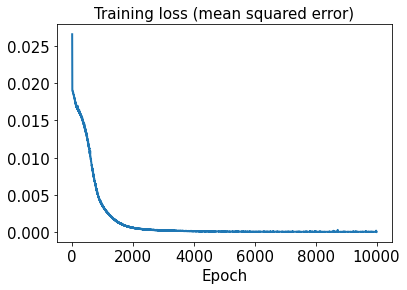

In [31]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

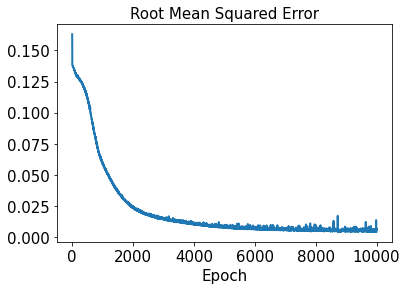

In [32]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
decoded_sensor_train = sensor_pred.predict(tsr_theta_train)
decoded_sensor_test = sensor_pred.predict(tsr_theta_test)

In [34]:
error_train_sensor = np.abs(decoded_sensor_train - x_train)
error_test_sensor = np.abs(decoded_sensor_test - x_test)

In [35]:
l2_error_sensor_train = np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2)
print(l2_error_sensor_train)

0.00070703763


In [36]:
l2_error_sensor_test = np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2)
print(l2_error_sensor_test)

0.015403604


In [37]:
l2_error_sensor_train_list = []
for i in range(0, len(x_train)):
    l2_error_sensor_train_data = np.sum((decoded_sensor_train[i] - x_train[i])**2) / np.sum(x_train[i]**2)
    l2_error_sensor_train_list.append(l2_error_sensor_train_data)

In [38]:
l2_error_sensor_test_list = []
for i in range(0, len(x_test)):
    l2_error_sensor_test_data = np.sum((decoded_sensor_test[i] - x_test[i])**2) / np.sum(x_test[i]**2)
    l2_error_sensor_test_list.append(l2_error_sensor_test_data)

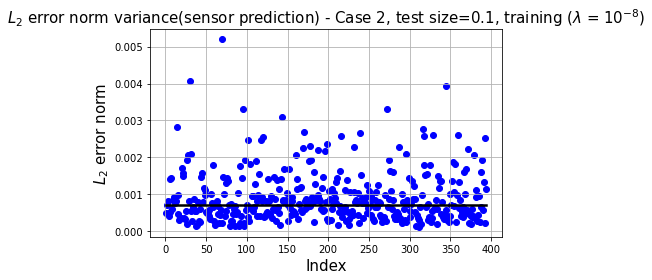

In [39]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 2, test size=0.1, training ($\lambda$ = $10^{-8}$)', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

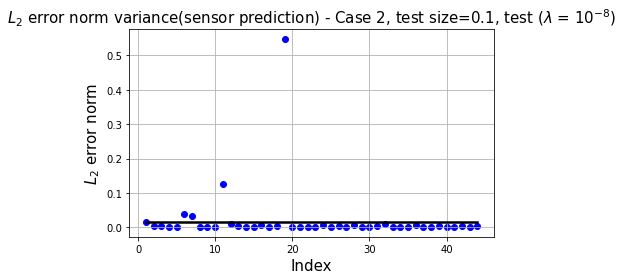

In [40]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title(r'$L_2$ error norm variance(sensor prediction) - Case 2, test size=0.1, test ($\lambda$ = $10^{-8}$)', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()